# Q1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
cutlet = pd.read_csv(r"Cutlets.csv")
cutlet

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [3]:
cutlet.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [4]:
cutlet.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

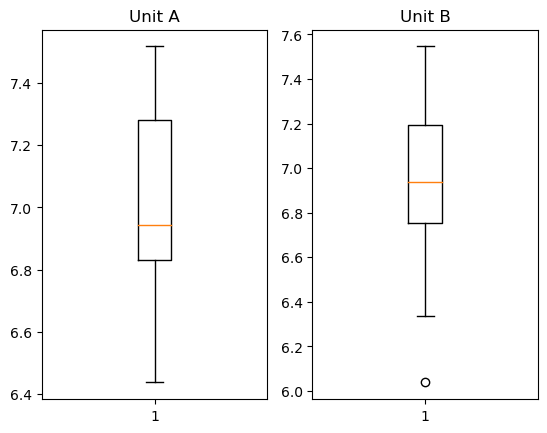

In [5]:

mt.subplot(121)
mt.boxplot(cutlet['Unit A'])
mt.title('Unit A')
mt.subplot(122)
mt.boxplot(cutlet['Unit B'])
mt.title('Unit B')
mt.show()

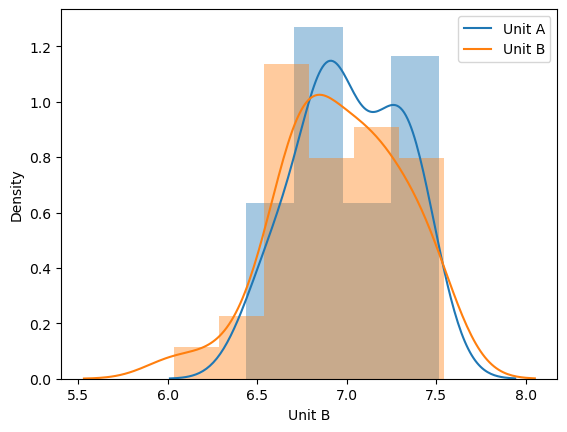

In [6]:
labels = ['Unit A', 'Unit B']
sns.distplot(cutlet['Unit A'],kde = True)
sns.distplot(cutlet['Unit B'],hist = True)
mt.legend(labels)
mt.show()

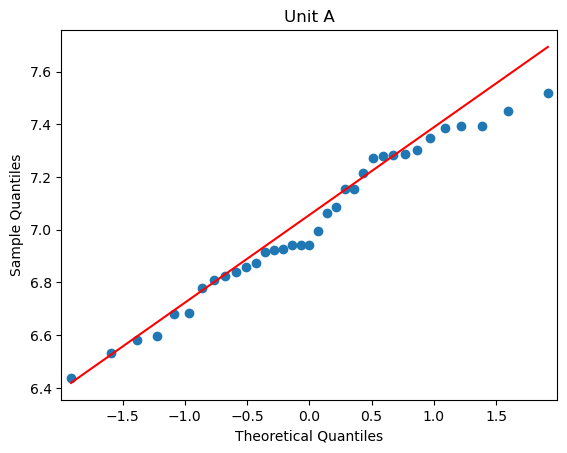

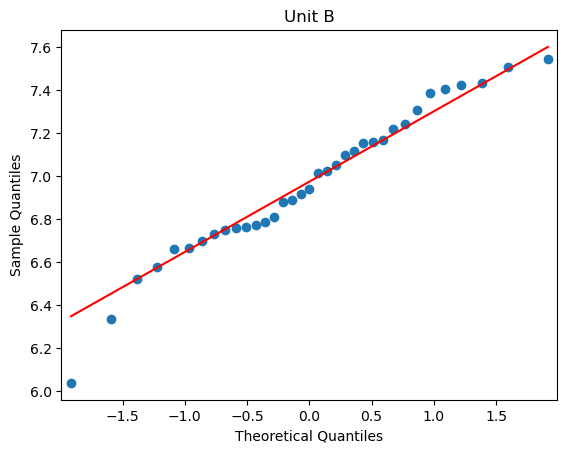

In [7]:
sm.qqplot(cutlet["Unit A"], line = 'q')
mt.title('Unit A')
sm.qqplot(cutlet["Unit B"], line = 'q')
mt.title('Unit B')
mt.show()

In [8]:
statistic , p_value = stats.ttest_ind(cutlet['Unit A'],cutlet['Unit B'], alternative = 'two-sided')
print('p_value=',p_value) 

p_value= 0.4722394724599501


In [9]:
alpha = 0.025
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between two Units A and B')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.025, p=0.472
We fail to reject Null hypothesis


# Hence, We fail to reject Null Hypothesis because of lack of evidence, there is no significant difference between the two samples

# Q2

In [10]:
lab = pd.read_csv(r"LabTAT.csv")
lab

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [11]:
lab.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


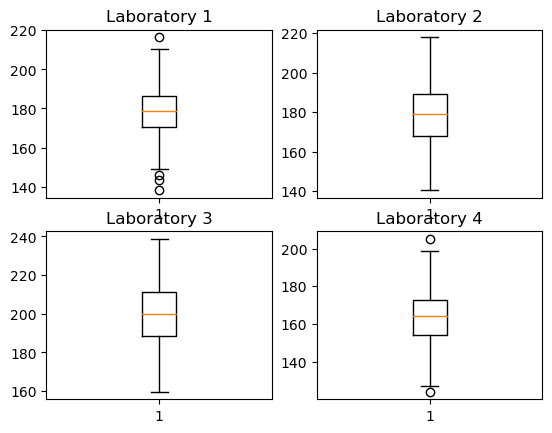

In [12]:
#mt.subplots(figsize = (16,9))
mt.subplot(221)
mt.boxplot(lab['Laboratory 1'])
mt.title('Laboratory 1')
mt.subplot(222)
mt.boxplot(lab['Laboratory 2'])
mt.title('Laboratory 2')
mt.subplot(223)
mt.boxplot(lab['Laboratory 3'])
mt.title('Laboratory 3')
mt.subplot(224)
mt.boxplot(lab['Laboratory 4'])
mt.title('Laboratory 4')
mt.show()

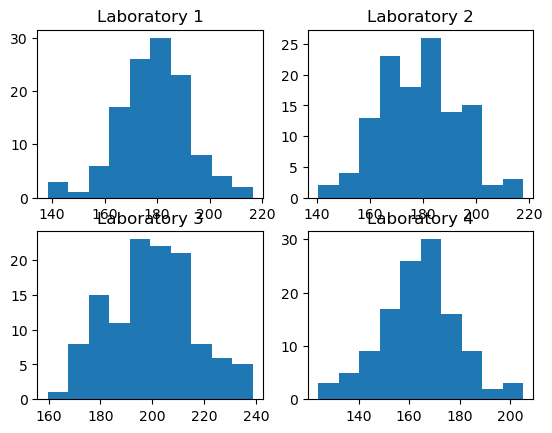

In [13]:
mt.subplot(221)
mt.hist(lab['Laboratory 1'])
mt.title('Laboratory 1')
mt.subplot(222)
mt.hist(lab['Laboratory 2'])
mt.title('Laboratory 2')
mt.subplot(223)
mt.hist(lab['Laboratory 3'])
mt.title('Laboratory 3')
mt.subplot(224)
mt.hist(lab['Laboratory 4'])
mt.title('Laboratory 4')
mt.show()

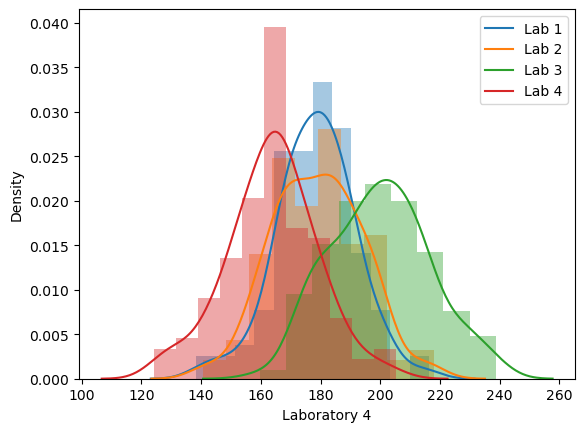

In [14]:
labels = ['Lab 1', 'Lab 2','Lab 3', 'Lab 4']
sns.distplot(lab['Laboratory 1'], kde = True)
sns.distplot(lab['Laboratory 2'],hist = True)
sns.distplot(lab['Laboratory 3'],hist = True)
sns.distplot(lab['Laboratory 4'],hist = True)
mt.legend(labels)
mt.show()

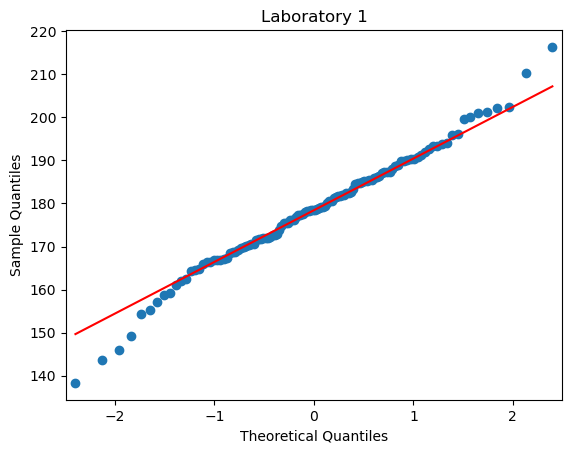

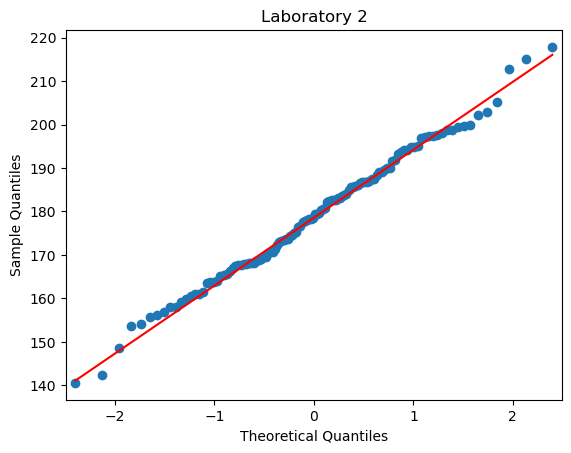

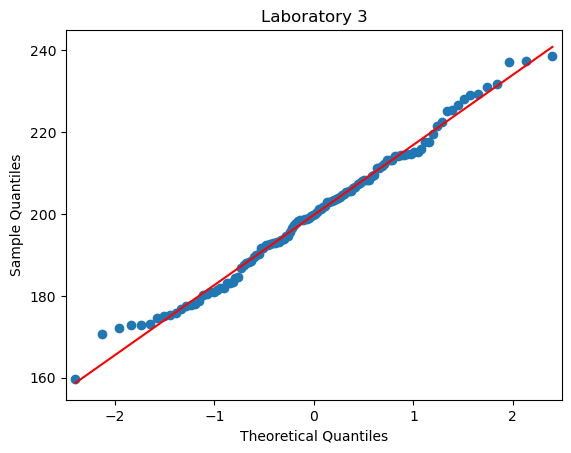

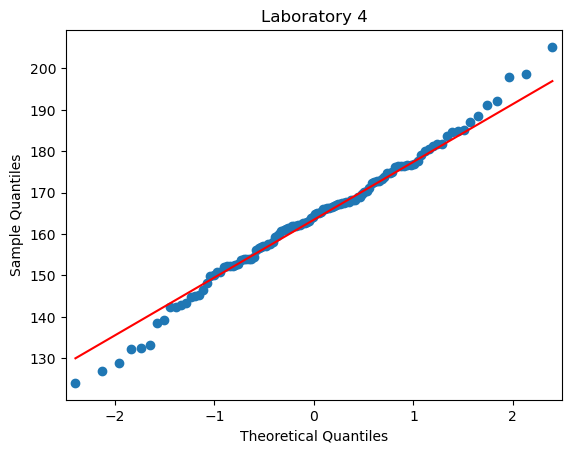

In [15]:
sm.qqplot(lab['Laboratory 1'], line = 'q')
mt.title('Laboratory 1')
sm.qqplot(lab['Laboratory 2'], line = 'q')
mt.title('Laboratory 2')
sm.qqplot(lab['Laboratory 3'], line = 'q')
mt.title('Laboratory 3')
sm.qqplot(lab['Laboratory 4'], line = 'q')
mt.title('Laboratory 4')
mt.show()

In [16]:
#Compare Evidences with Hypothesis using t-statictic
test_statistic , p_value = stats.f_oneway(lab.iloc[:,0],lab.iloc[:,1],lab.iloc[:,2],lab.iloc[:,3])
print('p_value =',p_value)

p_value = 2.1156708949992414e-57


In [17]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.000
We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories


# Q3

In [18]:
buyer= pd.read_csv(r"BuyerRatio.csv")
buyer

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [19]:
table = [[50,142,131,70],
        [435,1523,1356,750]]

## Applying Chi-Square contingency table to convert observed value into expected value

In [20]:
from scipy.stats import chi2_contingency

In [21]:
val=stats.chi2_contingency(table) 

In [22]:
val

Chi2ContingencyResult(statistic=1.595945538661058, pvalue=0.6603094907091882, dof=3, expected_freq=array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [23]:
observed = np.array([50, 142, 131, 70, 435, 1523, 1356, 750])
expected = np.array([42.76531299,  146.81287862,  131.11756787, 72.30424052, 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]) 

# Comparing Evidence with Hypothesis

In [24]:
statistics, p_value = stats.chisquare(observed, expected, ddof = 3)
print("Statistics = ",statistics,"\n",'P_Value = ', p_value)

Statistics =  1.5959455390914483 
 P_Value =  0.8095206646905712


In [25]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.810
We fail to reject Null hypothesis


## We fail to reject Null Hypothesis because of lack evidence. Therefore, there is no association or dependency between male-female buyers rations and are similar across regions. Hence, Independent samples

# Q4

In [26]:
center = pd.read_csv(r"Costomer+OrderForm.csv")
center

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [27]:
center.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [28]:
print(center['Phillippines'].value_counts(),'\n',center['Indonesia'].value_counts(),'\n',center['Malta'].value_counts(),'\n',center['India'].value_counts())

Error Free    271
Defective      29
Name: Phillippines, dtype: int64 
 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 
 Error Free    269
Defective      31
Name: Malta, dtype: int64 
 Error Free    280
Defective      20
Name: India, dtype: int64


In [29]:
contingency_table = [[271,267,269,280],
                    [29,33,31,20]]
print(contingency_table)

[[271, 267, 269, 280], [29, 33, 31, 20]]


In [30]:
stat, p, df, exp = stats.chi2_contingency(contingency_table) #Calculating Expected Values for Observed data
print("Statistics = ",stat,"\n",'P_Value = ', p,'\n', 'degree of freedom =', df,'\n', 'Expected Values = ', exp)

Statistics =  3.858960685820355 
 P_Value =  0.2771020991233135 
 degree of freedom = 3 
 Expected Values =  [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [31]:
#Defining Expected values and observed values
observed = np.array([271, 267, 269, 280, 29, 33, 31, 20])
expected = np.array([271.75, 271.75, 271.75, 271.75, 28.25, 28.25, 28.25, 28.25])

In [32]:
#Compare Evidences with Hypothesis using t-statictic
test_statistic , p_value = stats.chisquare(observed, expected, ddof = df)
print("Test Statistic = ",test_statistic,'\n', 'p_value =',p_value)

Test Statistic =  3.858960685820355 
 p_value = 0.4254298144535761


In [33]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.425
We fail to reject Null hypothesis


# We fail to reject Null Hypothesis because of lack of evidence.